In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/인지기_에니스/new version/train가스.csv',
                 encoding = 'euc-kr')

In [ ]:
df.head()

,num,date_time,가스사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,437.614,17.6,2.5,92.0,0.8,0.0,0,0
1,1,2020-06-01 01,347.376,17.7,2.9,91.0,0.3,0.0,0,0
2,1,2020-06-01 02,259.021,17.5,3.2,91.0,0.0,0.0,0,0
3,1,2020-06-01 03,245.573,17.1,3.2,91.0,0.0,0.0,0,0
4,1,2020-06-01 04,299.004,17.0,3.3,92.0,0.0,0.0,0,0


In [ ]:
def vis_time_series_decompose(num):
    d = df[df.num==num]
    d.index = d.date_time

    res = sm.tsa.seasonal_decompose(d['가스사용량(kWh)'], model='additive')

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
    res.observed.plot(ax=ax1, title='Observed')
    res.trend.plot(ax=ax2, title='Trend')
    res.resid.plot(ax=ax3, title='Residual')
    res.seasonal.plot(ax=ax4, title='Seasonal')
    plt.tight_layout()
    plt.show()


In [ ]:
#요일
def weekday(x):
    if x.dayofweek == 6:
        return '일'
    elif x.dayofweek == 0:
        return '월'
    elif x.dayofweek == 1:
        return '화'
    elif x.dayofweek == 2:
        return '수'
    elif x.dayofweek == 3:
        return '목'
    elif x.dayofweek == 4:
        return '금'
    else:
        return '토'

# 주말 여부
def weekend(x):
    if x.dayofweek in [5, 6]:
        return 1
    else: 
        return 0

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month

df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['weekday'] = df['date_time'].apply(weekday)
df['weekend'] = df['date_time'].apply(weekend)
'''
test['month'] = test['date_time'].dt.month
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour
test['weekday'] = test['date_time'].apply(weekday)
test['weekend'] = test['date_time'].apply(weekend)
'''

"\ntest['month'] = test['date_time'].dt.month\ntest['day'] = test['date_time'].dt.day\ntest['hour'] = test['date_time'].dt.hour\ntest['weekday'] = test['date_time'].apply(weekday)\ntest['weekend'] = test['date_time'].apply(weekend)\n"

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

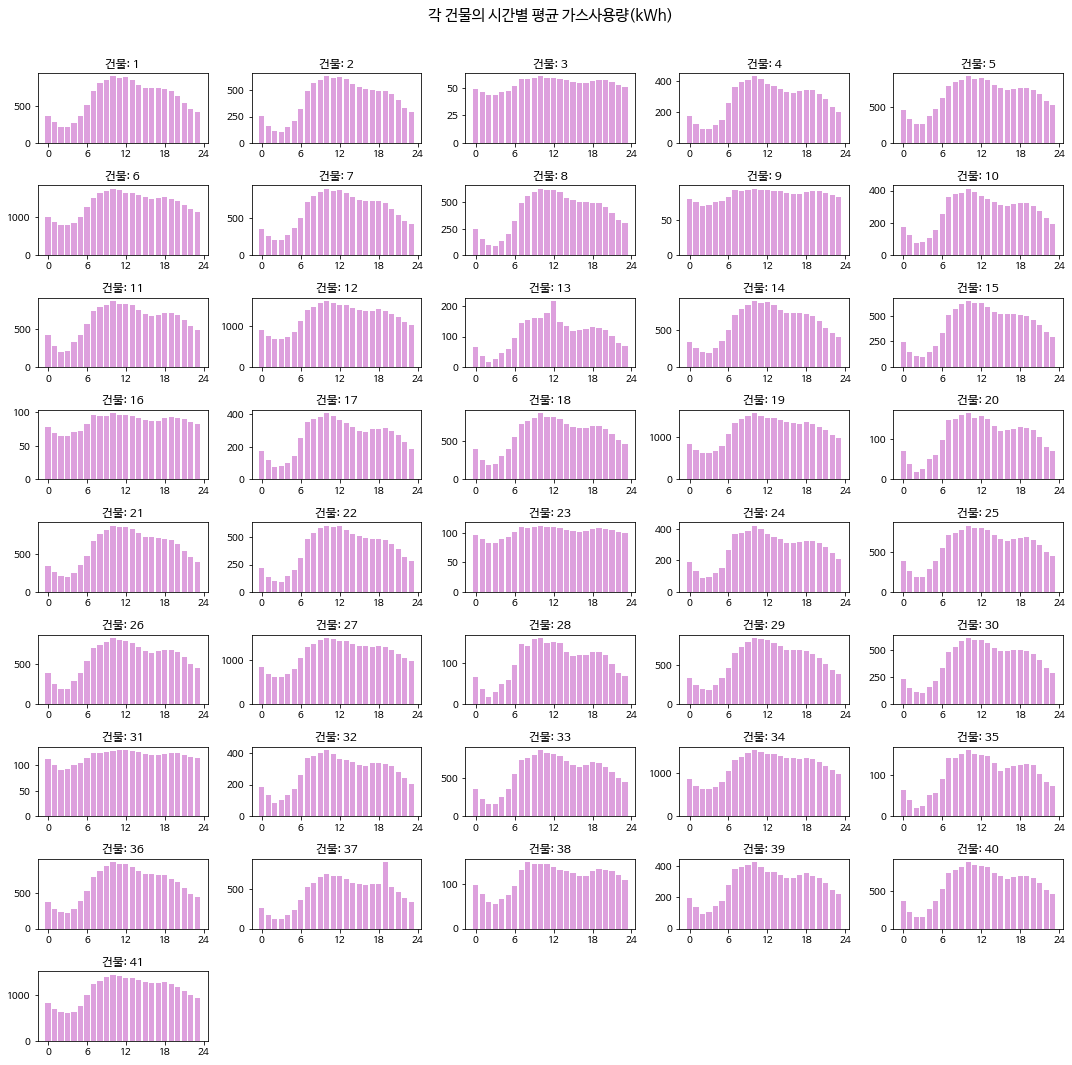

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간별 평균 가스사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,42):
    d = df[df.num==num]
    max_num = max(d.groupby('hour')['가스사용량(kWh)'].mean())
    min_num = min(d.groupby('hour')['가스사용량(kWh)'].mean())
    ax = fig.add_subplot(9,5,num)
    ax.bar(d['hour'].unique(), d.groupby('hour')['가스사용량(kWh)'].mean(), width = 0.8,
           color = 'plum')
    
    
    #plt.ylim(min_num-150, max_num+200)
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
plt.tight_layout()
plt.show()

**매 시간 사용량이 일정한 건물**
  

*   항목 추가
*   항목 추가



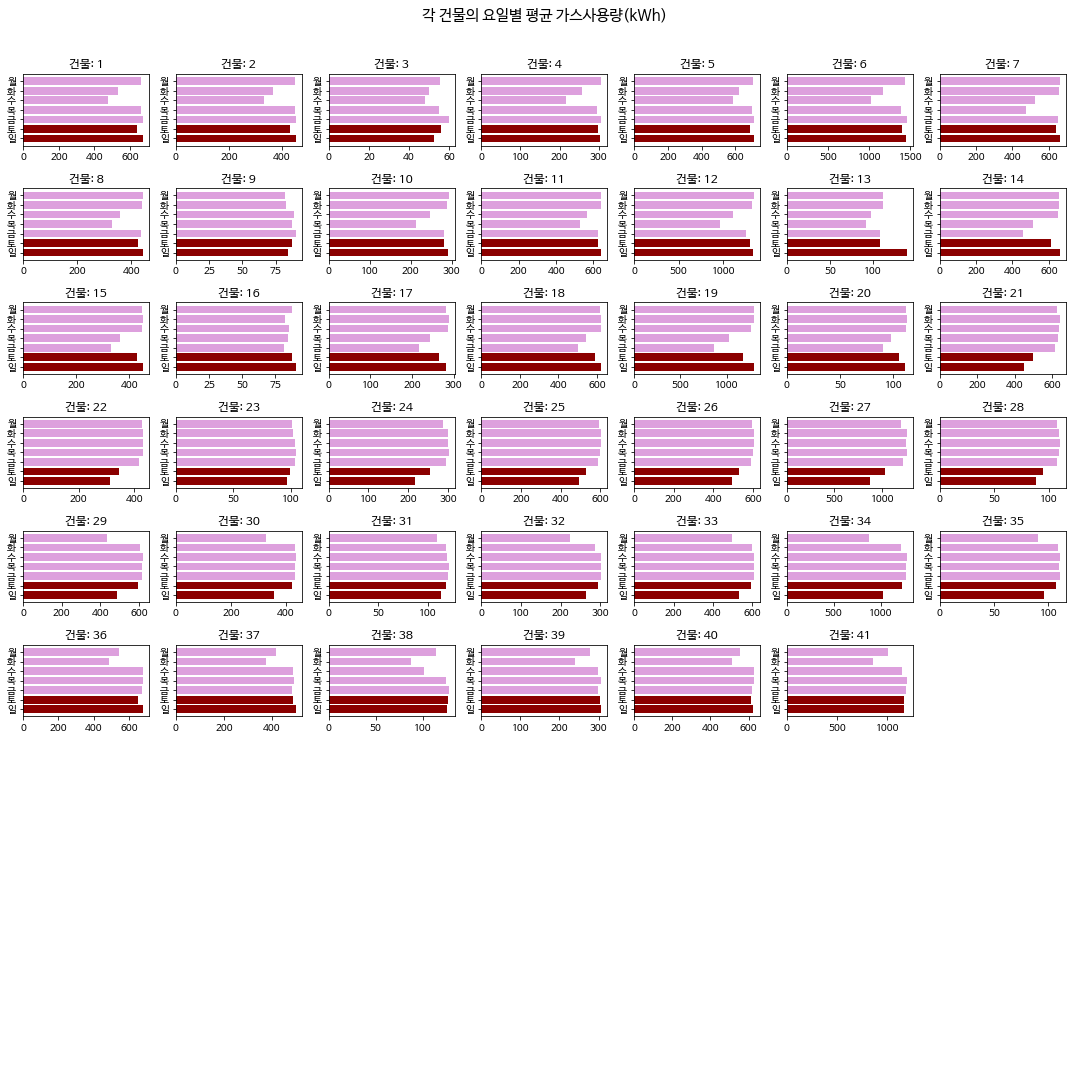

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 요일별 평균 가스사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

#weekday = ['월','화','수','목','금','토','일']
#colors = ['plum','plum','plum','plum','plum', 'darkred','darkred']

weekday = ['일','토','금','목','수','화','월']
colors = ['darkred','darkred', 'plum','plum','plum','plum','plum']

for num in range(1,42):
    d = df[df.num==num]
    d_counts = d.groupby('weekday')['가스사용량(kWh)'].mean()
    d_counts = d_counts.reindex(weekday)
    ax = fig.add_subplot(9,7,num)
    dayy = ['일', '토', '금', '목', '수', '화', '월']
    ax.barh(dayy, d_counts, color=colors)
    ax.set_title(f'건물: {num}')

plt.tight_layout()
plt.show()

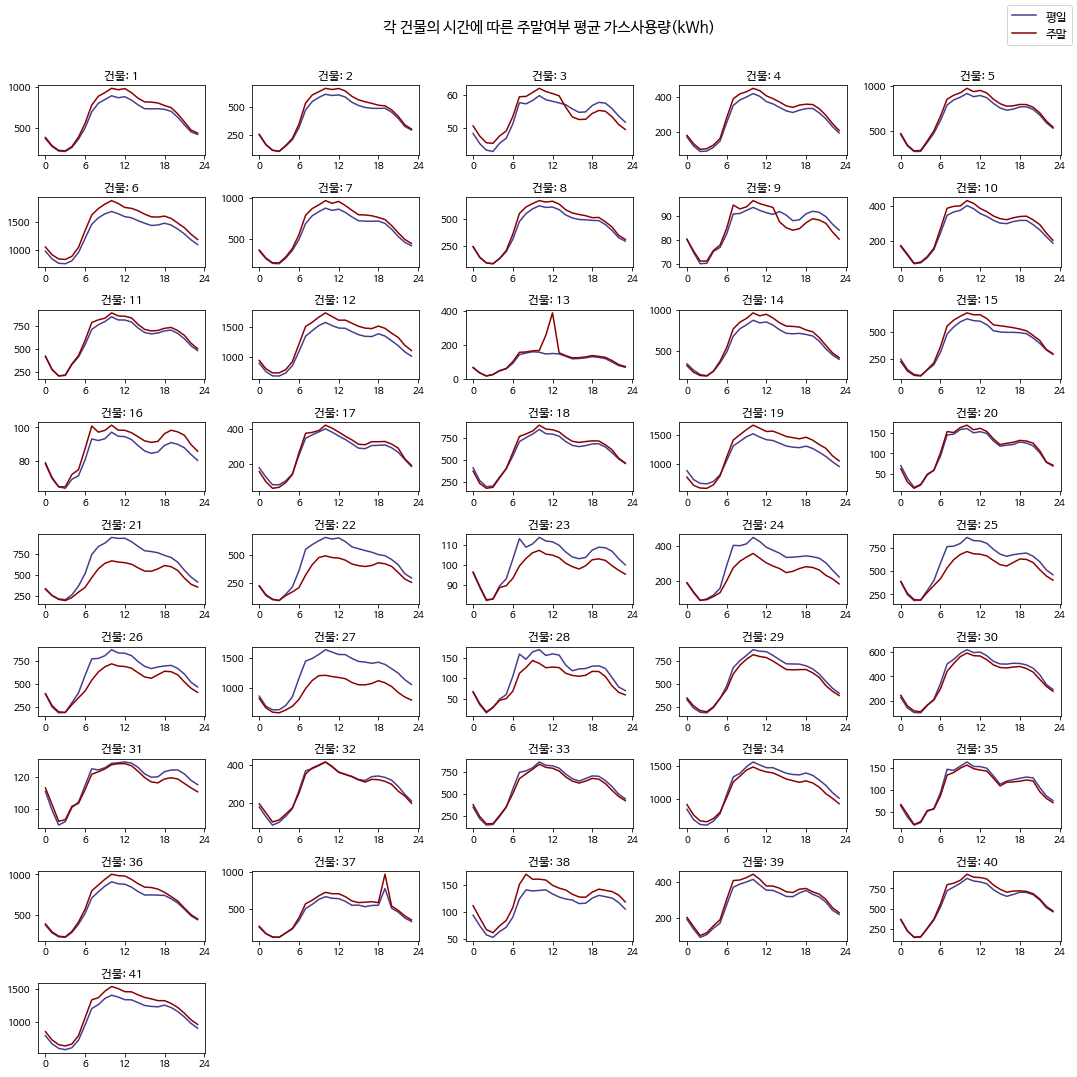

In [ ]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간에 따른 주말여부 평균 가스사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,42):
    d = df[df.num==num]
    ax = fig.add_subplot(9,5,num)
    ax.plot(d['hour'].unique(), d[d.weekend==0].groupby('hour')['가스사용량(kWh)'].mean(), label='평일', color='darkslateblue')
    ax.plot(d['hour'].unique(), d[d.weekend==1].groupby('hour')['가스사용량(kWh)'].mean(), label='주말', color='darkred')
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 1, prop={'size':12})
plt.tight_layout()
plt.show()

**시계열 시각화**

In [ ]:
def vis_time_series_decompose(num):
    d = df[df.num==num]
    d.index = d.date_time

    res = sm.tsa.seasonal_decompose(d['가스사용량(kWh)'], model='additive')

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
    res.observed.plot(ax=ax1, title='Observed', color='darkslateblue')
    res.trend.plot(ax=ax2, title='Trend', color='darkslateblue')
    res.resid.plot(ax=ax3, title='Residual', color='darkslateblue')
    res.seasonal.plot(ax=ax4, title='Seasonal', color='darkslateblue')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


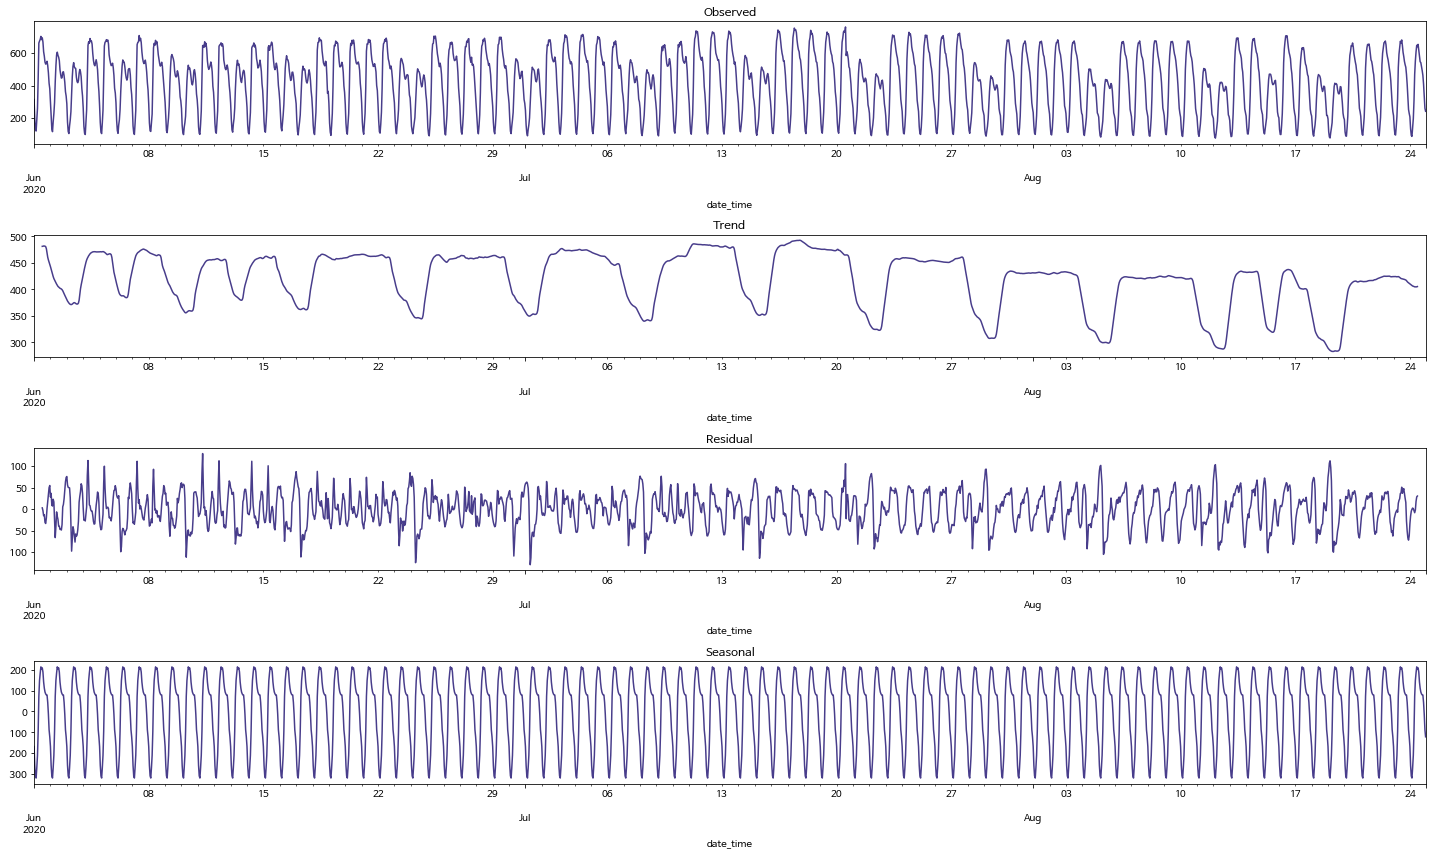

In [ ]:
vis_time_series_decompose(num=2)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


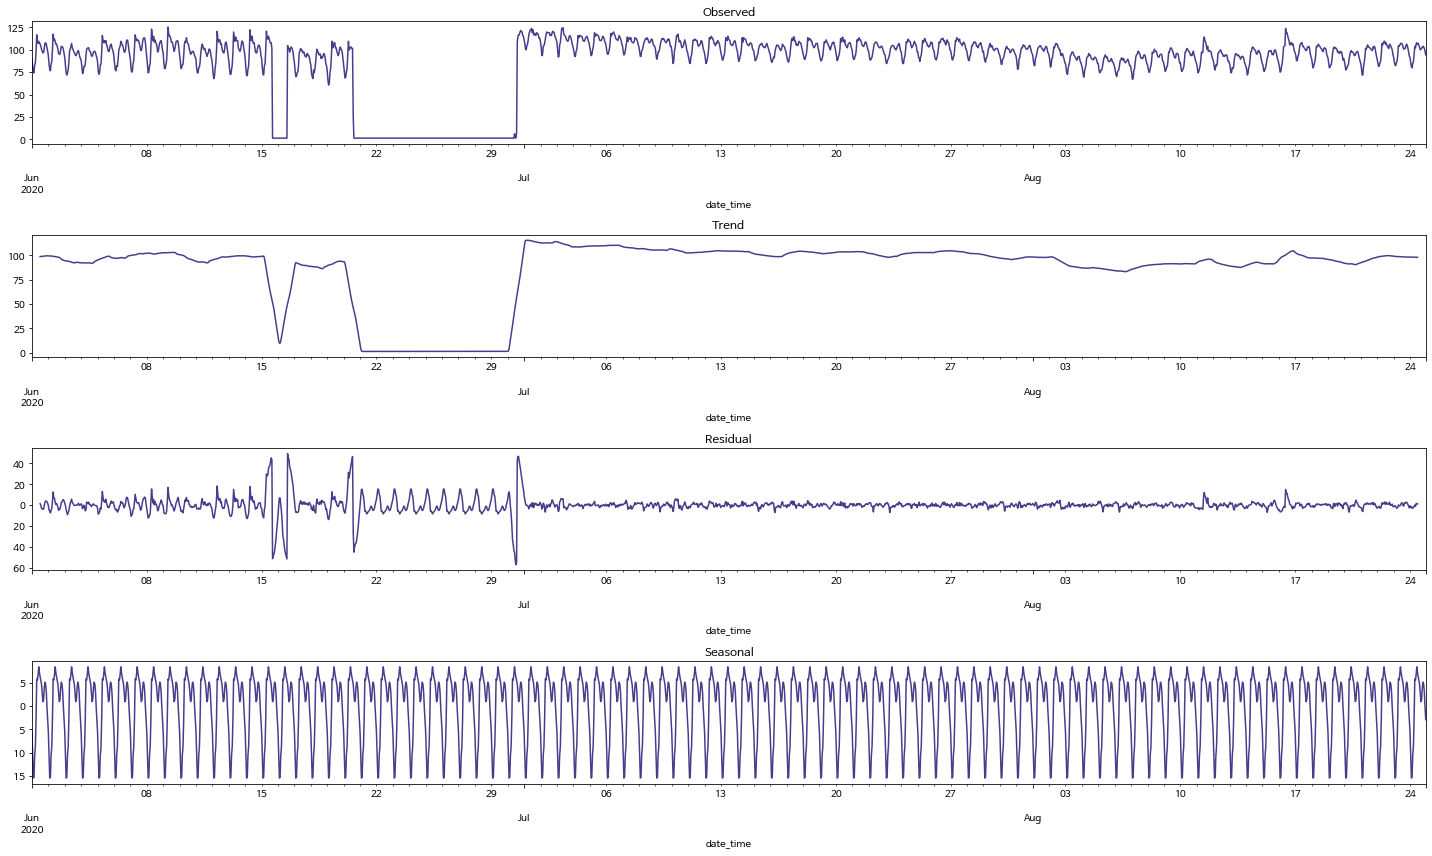

In [ ]:
vis_time_series_decompose(num=9)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


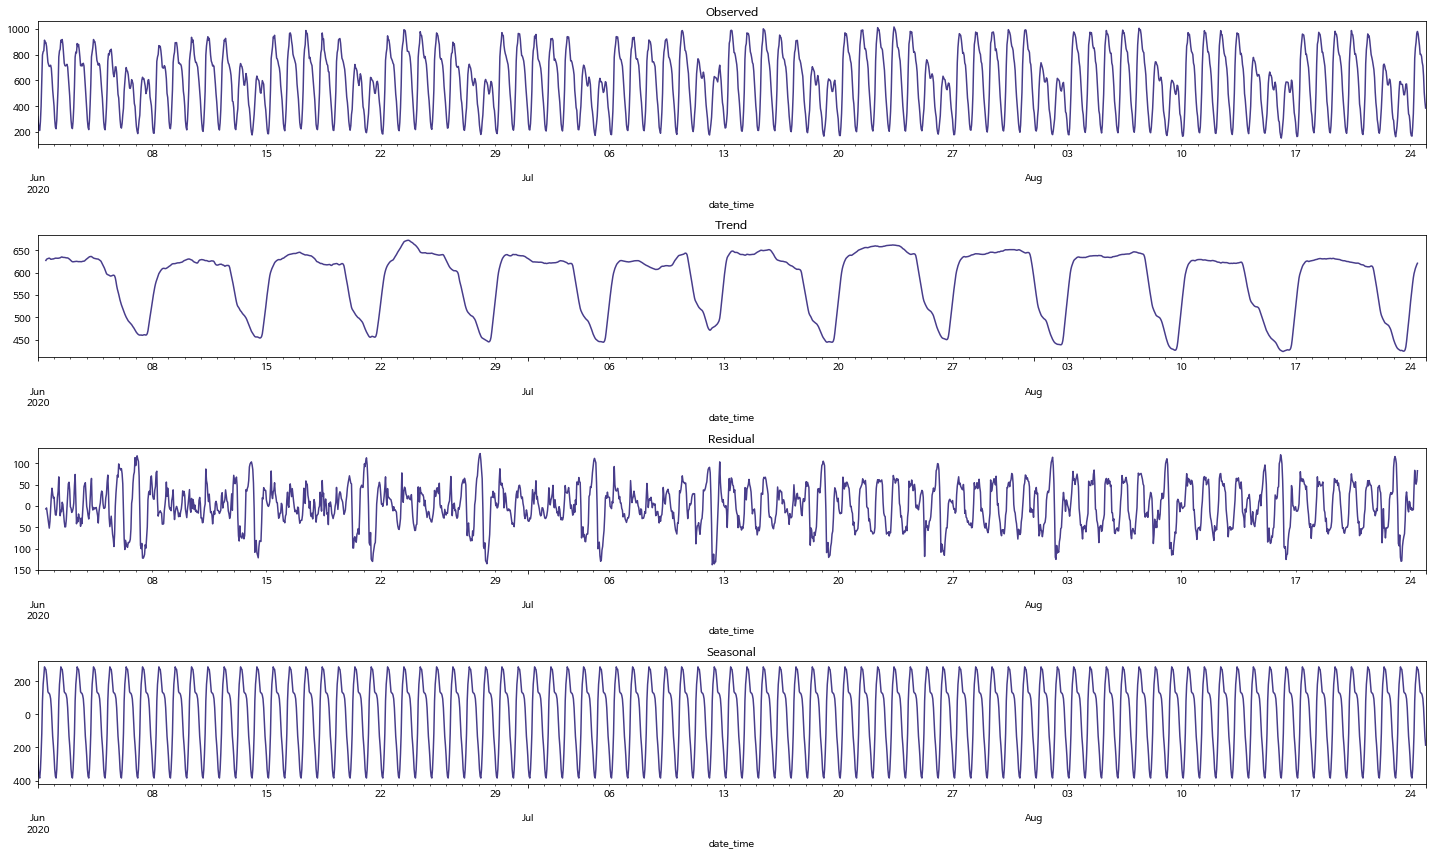

In [ ]:
vis_time_series_decompose(num=21)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


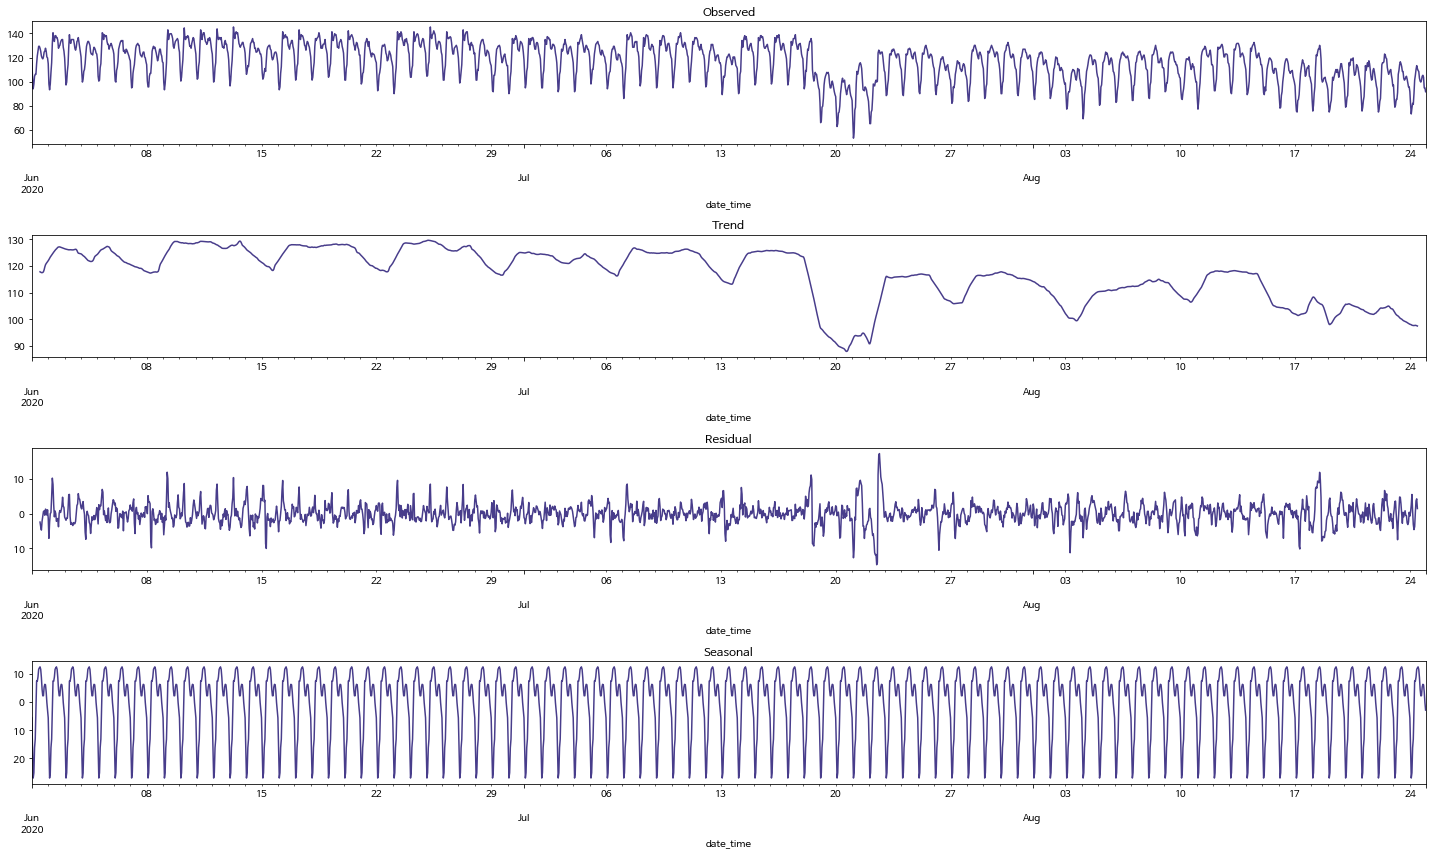

In [ ]:
vis_time_series_decompose(num=31)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


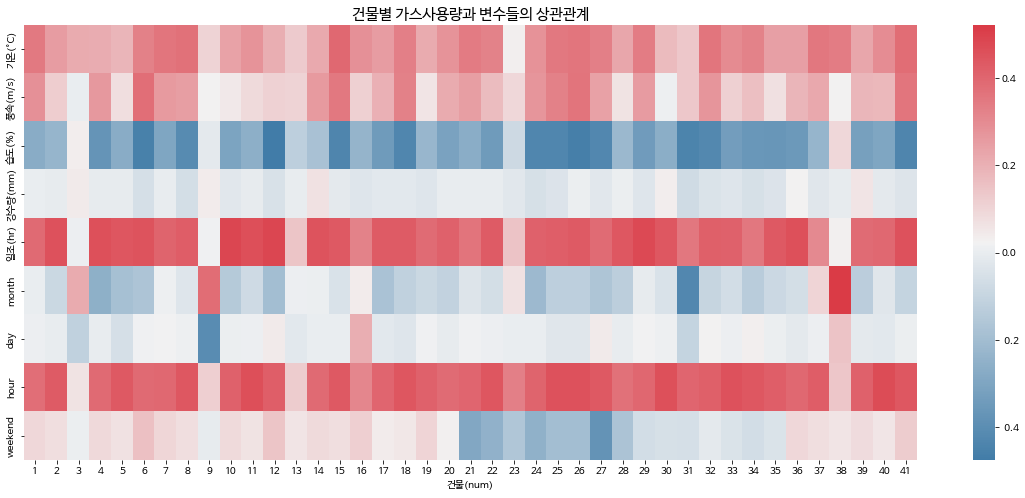

In [ ]:
corr = []
for num in range(1,42):
    d = df[df.num==num]
    num_corr = d.corr()['가스사용량(kWh)']
    num_corr = num_corr.drop(['num','비전기냉방설비운영','태양광보유','가스사용량(kWh)'])
    corr.append(num_corr)
corr_df = pd.concat(corr, axis=1).T
corr_df.index = list(range(1,42))

# 시각화
f, ax = plt.subplots(figsize=(20,8))
plt.title("건물별 가스사용량과 변수들의 상관관계", fontsize=15)
sns.heatmap(corr_df.T, cmap=sns.diverging_palette(240,10,as_cmap=True), ax=ax)
plt.xlabel('건물(num)')
plt.show()